### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

### Loading the dataset

In [4]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [5]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
print("Training Set: ",train.shape)
print("Testing Set: ",test.shape)

Training Set:  (2000, 21)
Testing Set:  (1000, 21)


### EDA

In [11]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [15]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [29]:
# Finding the target classes
train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [17]:
# Dropping the id column from the test set

test.drop('id',inplace=True,axis=1)

In [21]:
# Checking for null values
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


### Visualization

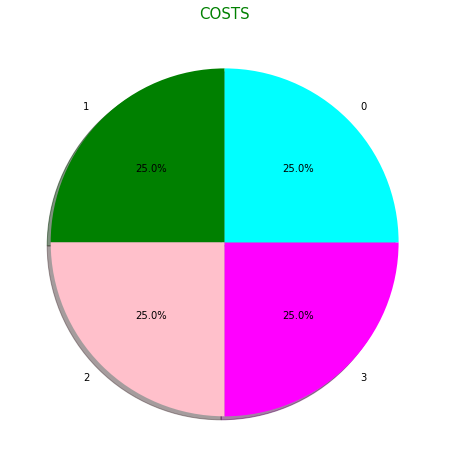

In [26]:
# Checking distribution of given train data wrt target classes

labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

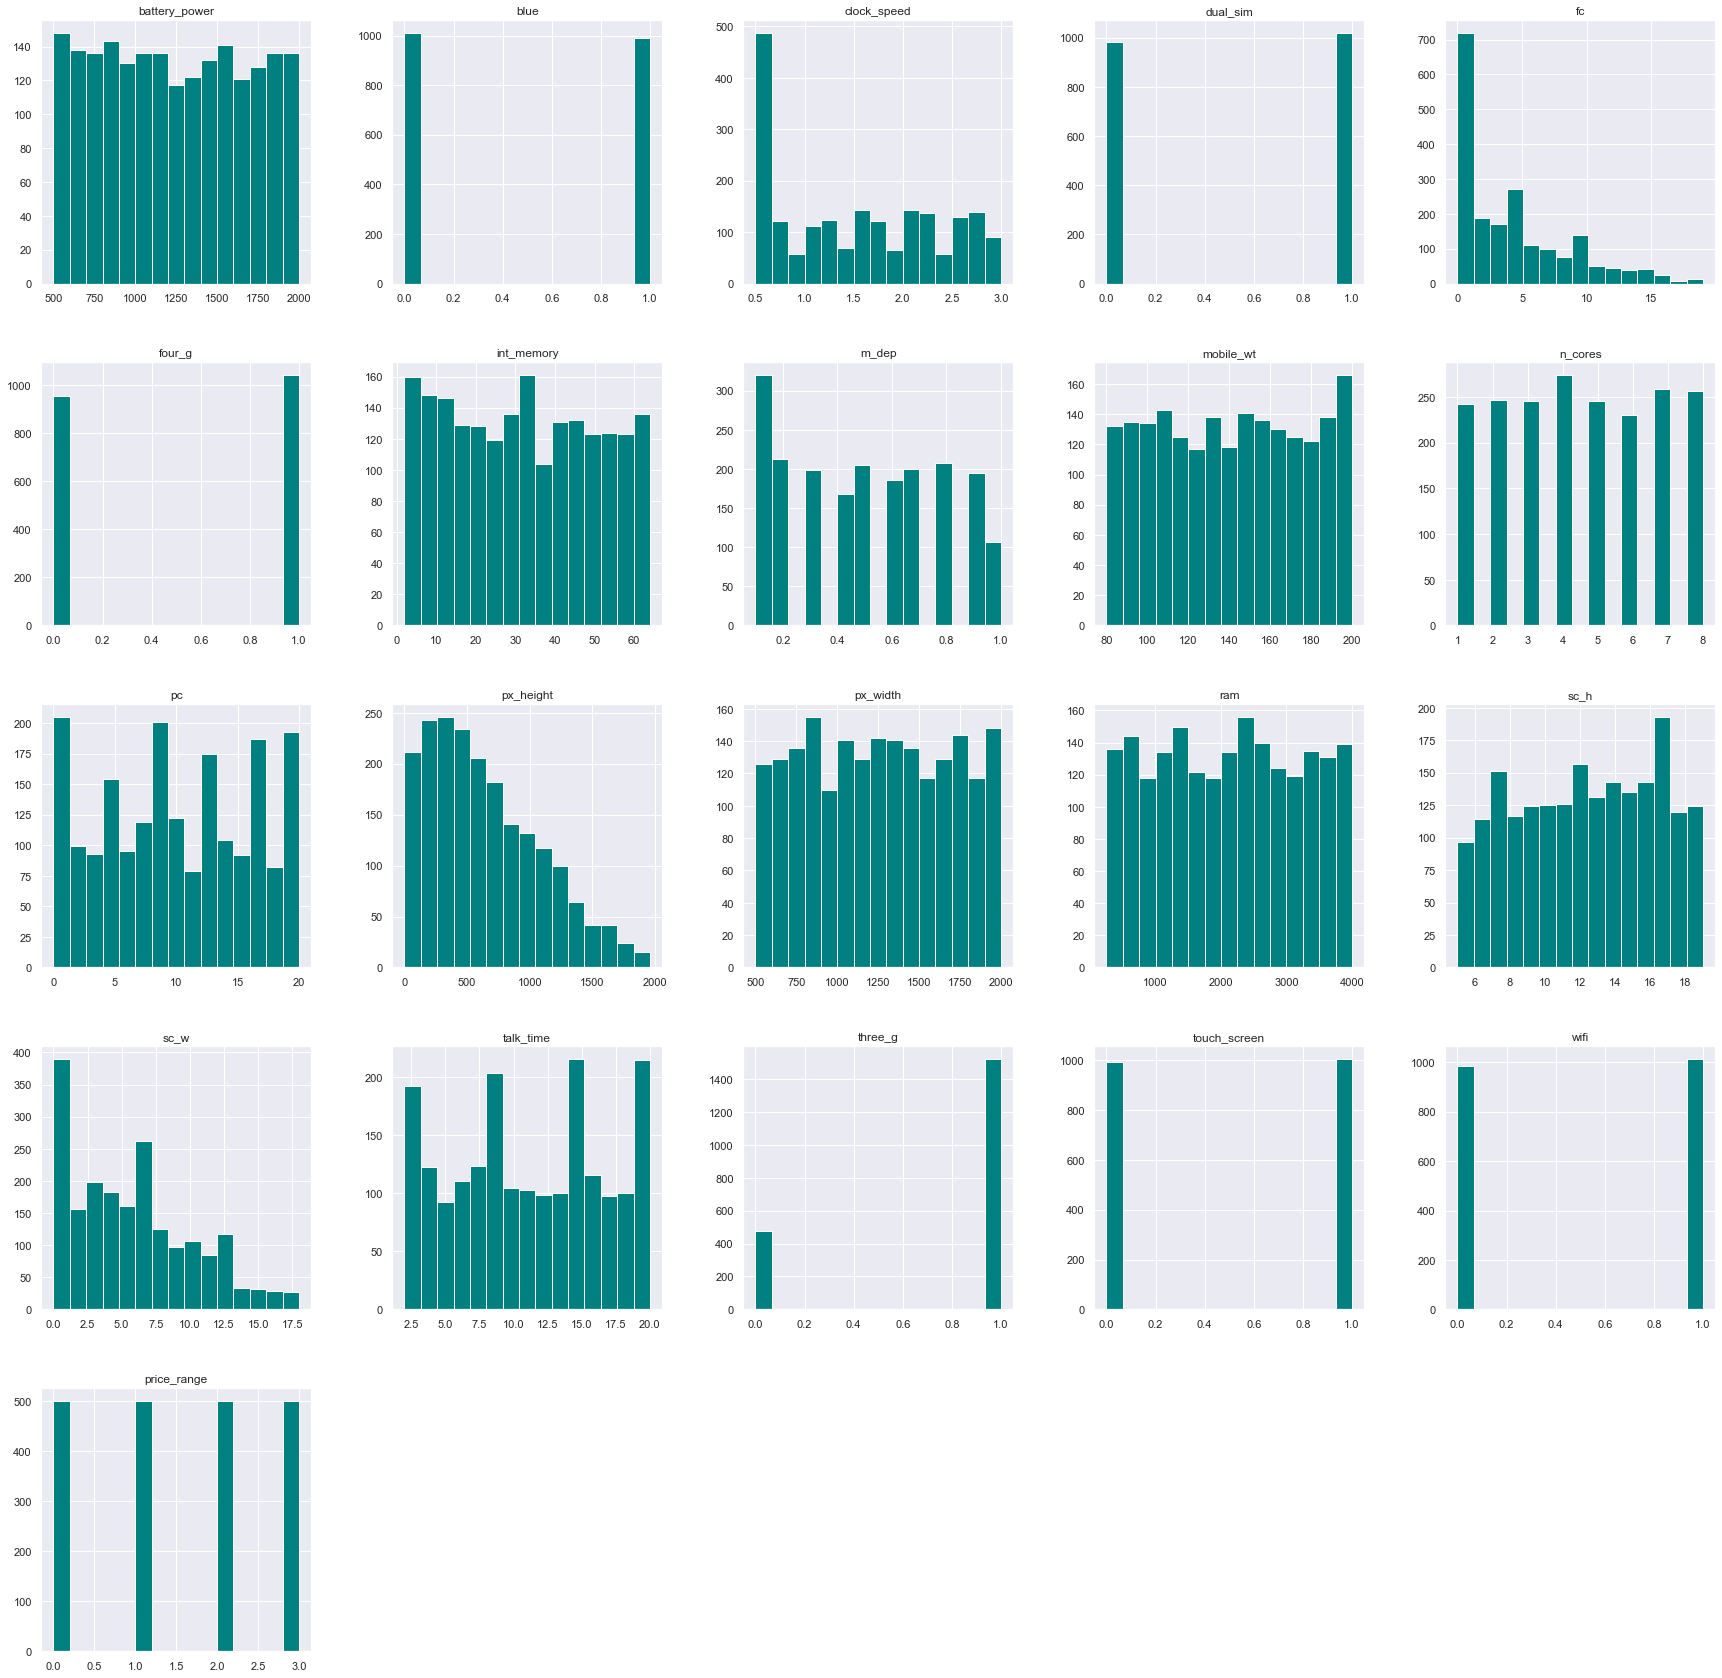

In [34]:
plt.style.use("seaborn-darkgrid")
sns.set()

train.hist(bins=15, figsize=(30,30), color='teal')
plt.title("Histogram Plot of the Features")
plt.show()

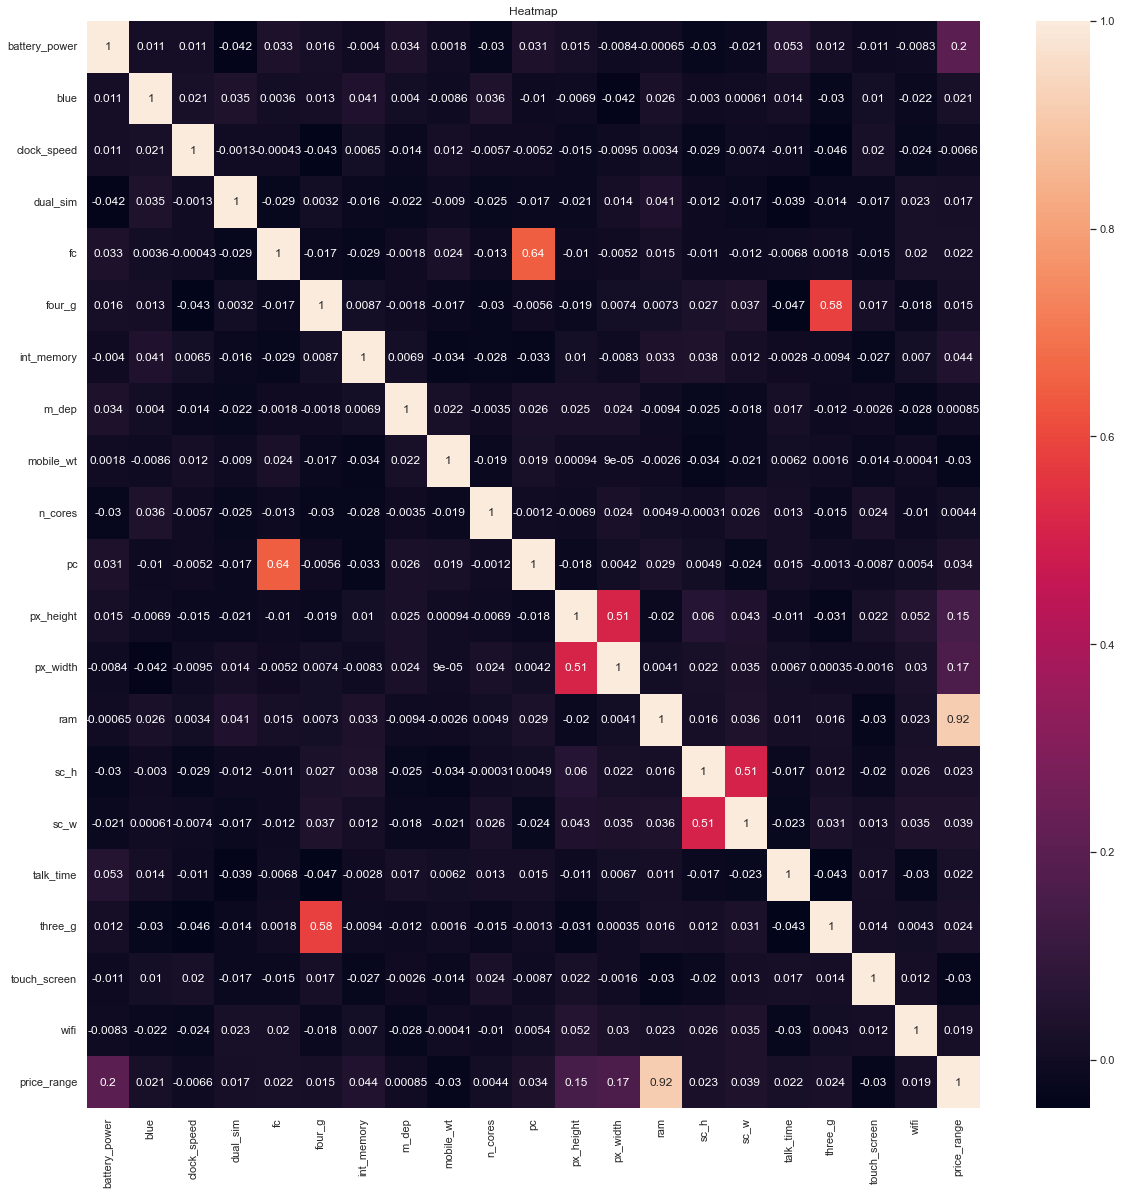

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True)
plt.title("Heatmap")
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='ram'>

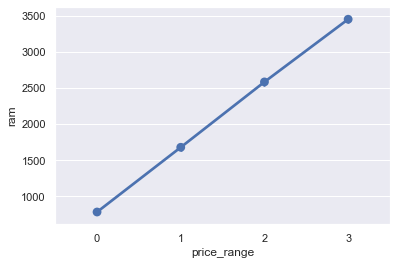

In [43]:
sns.pointplot(y='ram',x='price_range',data=train)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

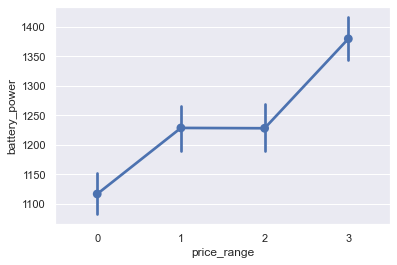

In [50]:
sns.pointplot(x='price_range',y='battery_power',data=train)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

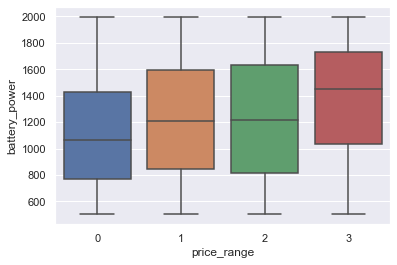

In [46]:
sns.boxplot(x='price_range',y='battery_power',data=train)

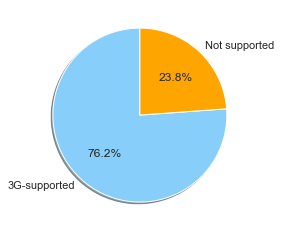

In [62]:
labels = ["3G-supported",'Not supported']
values = train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['lightskyblue', 'orange']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

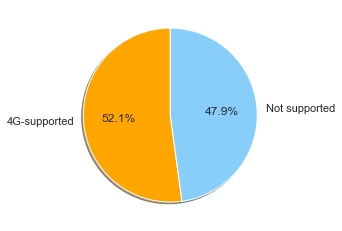

In [64]:
labels = ["4G-supported",'Not supported']
values = train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

### Training the Model

In [65]:
X = train.drop('price_range',axis=1)
y = train['price_range']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision Tree Classifier

In [68]:
clf_DT = DecisionTreeClassifier(random_state=0)

In [70]:
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [72]:
y_pred = clf_DT.predict(X_test)

In [83]:
resDT = []
resDT.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf_DT.score((X_train),y_train),
                           "Test_Score" : clf_DT.score((X_test), y_test)})))

In [101]:
print(resDT[0])

Precision      0.825125
Recall         0.825181
F1             0.824565
Accuracy       0.827500
Train_Score    1.000000
Test_Score     0.827500
dtype: float64


### Random Forest Classifier

In [87]:
clf_RF = RandomForestClassifier(random_state=0)

In [88]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [89]:
y_pred = clf_RF.predict(X_test)

In [90]:
resRF = []
resRF.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf_RF.score((X_train),y_train),
                           "Test_Score" : clf_RF.score((X_test), y_test)})))

In [100]:
print(resRF[0])

Precision      0.853572
Recall         0.855520
F1             0.854394
Accuracy       0.857500
Train_Score    1.000000
Test_Score     0.857500
dtype: float64


### Support Vector Classifier

In [93]:
clf_SVC = SVC(random_state=0)

In [94]:
clf_SVC.fit(X_train, y_train)

SVC(random_state=0)

In [95]:
y_pred = clf_SVC.predict(X_test)

In [96]:
resSVC = []
resSVC.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf_SVC.score((X_train),y_train),
                           "Test_Score" : clf_SVC.score((X_test), y_test)})))

In [99]:
print(resSVC[0])

Precision      0.955357
Recall         0.954335
F1             0.954309
Accuracy       0.955000
Train_Score    0.954375
Test_Score     0.955000
dtype: float64
